# STAT 306 Group Project #

## Introduction

The dataset we chose to conduct our analysis is the ‘Student Performance’ dataset obtained from the UC Irvine Machine Learning Repository.  It measures student achievement in secondary education across two Portuguese schools, Gabriel Pereira and Mousinho da Silveira, during the 2005-2006 school year. The dataset consists of 33 variables, including student grades, demographic information, and social and school-related factors, all collected from school reports and questionnaires. Two data files are included in the dataset, one for the subject of Math and one for Portuguese. We chose to focus on the file for ‘Math’, as our group consists of Math and Statistics students and this is more applicable to our fields of study.

Variables: 
- **sex**: Student's sex:  'F' (female) or 'M' (male).
- **age**: Student's age, ranging from 15 to 22. 
- **address**: Student's home address type: 'U' (urban) or 'R' (rural).
- **famsize**: Family size: 'LE3' (less or equal to 3) or 'GT3' (greater than 3).
- **Pstatus**: Parent's cohabitation status: T' (together) or 'A' (apart).
- **Medu**: Mother's education level, coded from 0 (none) to 4 (higher education).
- **Fedu**: Father's education level, coded from 0 (none) to 4 (higher education).
- **Mjob**: Mother's job, coded as 'teacher', 'health', 'services', 'at_home', or 'other'.
- **Fjob**: Father's job, coded as 'teacher', 'health', 'services', 'at_home', or 'other'.
- **reason**:Reasons to choose the school, coded as 'home', 'reputation', 'course', or 'other'.
- **guardian**: Student's guardian, coded as 'mother', 'father', or 'other'.
- **traveltime**: Home to school travel time, coded from 1 (<15 min) to 4 (>1 hour).
- **studytime**: Weekly study time, coded from 1 (<2 hours) to 4 (>10 hours).
- **failures**: Number of past class failures, coded from 0 (none) to 4 (4 or more).
- **school_support**: Extra educational support, coded as 'yes' or 'no'.
- **family_support**: Family educational support, coded as 'yes' or 'no'.
- **paid**: Extra paid classes within the course subject, coded as 'yes' or 'no'.
- **activities**: Participation in extracurricular activities, coded as 'yes' or 'no'.
- **nursery**: Attended nursery school, coded as 'yes' or 'no'.
- **higher**: Plans for higher education, coded as 'yes' or 'no'.
- **internet**: Home internet access, coded as 'yes' or 'no'.
- **romantic**:In a romantic relationship, coded as 'yes' or 'no'.
- **famrel**: Quality of family relationships, rated from 1 (very bad) to 5 (excellent).
- **freetime**: Free time after school, rated from 1 (very low) to 5 (very high).
- **goout**: Going out with friends, rated from 1 (very low) to 5 (very high).
- **Dalc**: Workday alcohol consumption, rated from 1 (very low) to 5 (very high).
- **Walc**: Weekend alcohol consumption, rated from 1 (very low) to 5 (very high).
- **health**: Current health status, rated from 1 (very bad) to 5 (very good).
- **absences**: Number of school absences, ranging from 0 to 93.
- **G3**: Final grade, ranging from 0 to 20 (output target).

Note: We have excluded the variables 'school' (name of school; included as part of background of data) and 'G1' and 'G2' (first and second period grade; G3 is a function of G1 and G2 so they are strongly correlated).

As students ourselves, naturally we are interested in understanding the factors that contribute to academic success, and how our backgrounds and choices influence our performance. As such, this dataset caught our eye, as it can provide insight into our own lives and our academic careers. This leads us to our research question:

<center>What external factors are associated with a student’s academic performance?</center>



In [1]:
# Import libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the dataset
data <- read.csv("student-mat.csv", header = TRUE, sep = ";")
head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
# Wrangling the dataset
data <- data |>
    mutate(final_grade = G3, age = as.factor(age), Medu = as.factor(Medu), Fedu = as.factor(Fedu), traveltime = as.factor(traveltime), studytime = as.factor(studytime), 
           failures = as.factor(failures), romantic = as.factor(romantic), famrel = as.factor(famrel), freetime = as.factor(freetime), goout = as.factor(goout), 
           Dalc = as.factor(Dalc), Walc = as.factor(Walc), health = as.factor(health)) |>
    select(-school, -G1, -G2, -G3)
head(data)

# Filter the data to exclude rows where final_grade = 0
filtered_data <- data %>% filter(data$final_grade > 0)
head(filtered_data)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


In [4]:
sum(is.na(data))

[1] 0

## Exploratory Data Analysis

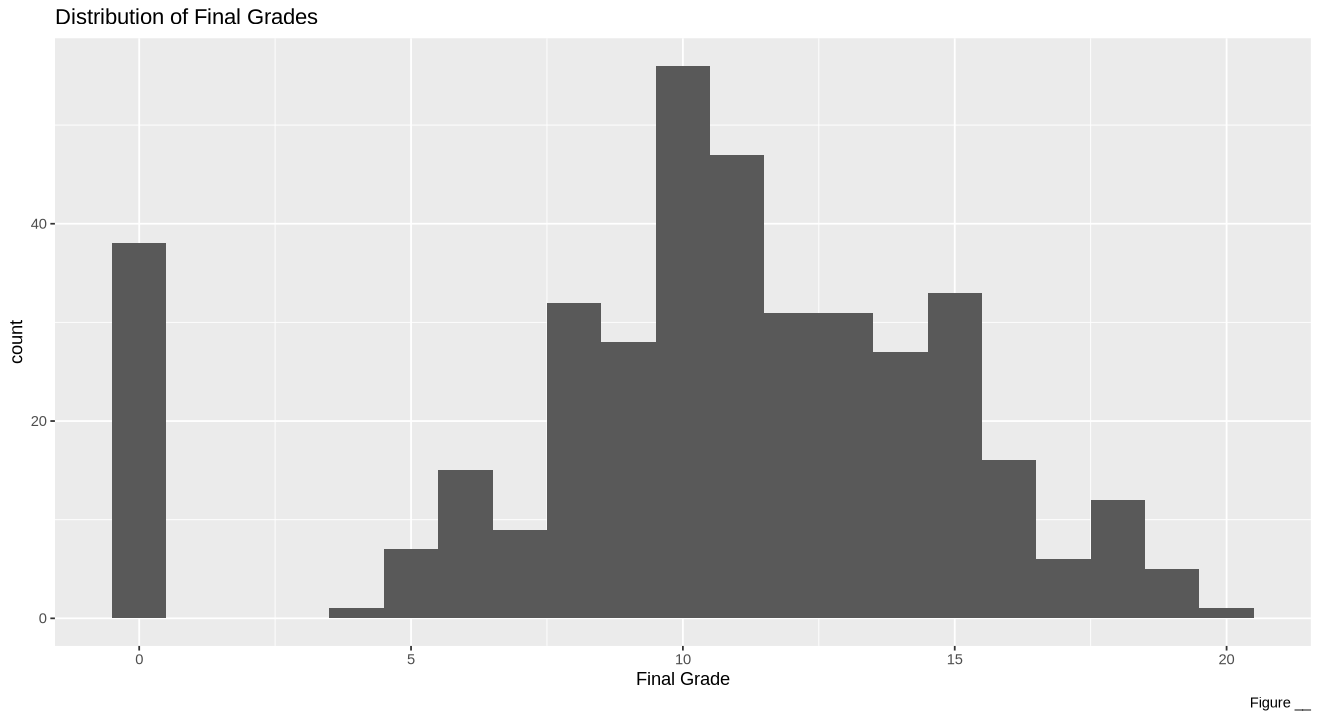

In [9]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        caption = "Figure __") 
students_grade_dist

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


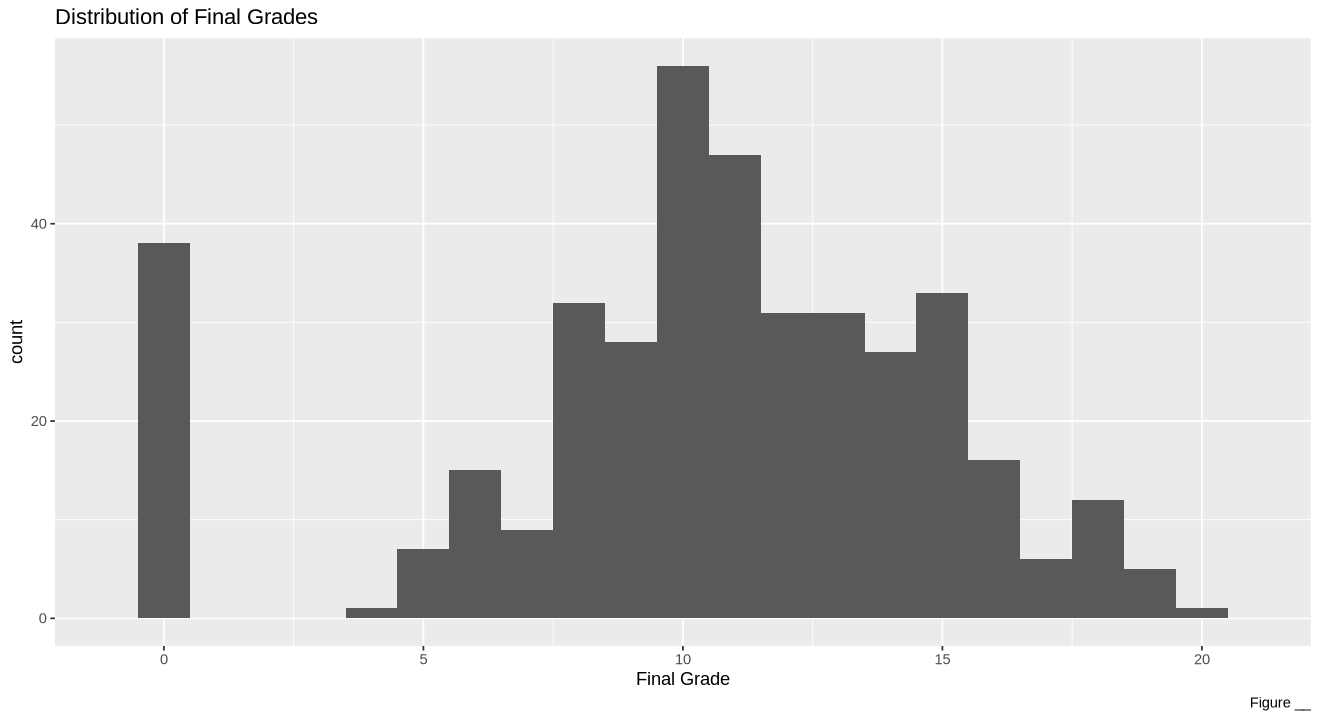

In [11]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist_new <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    scale_x_continuous(limits = range(-1, data$final_grade+1)) +
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        caption = "Figure __") 
students_grade_dist_new

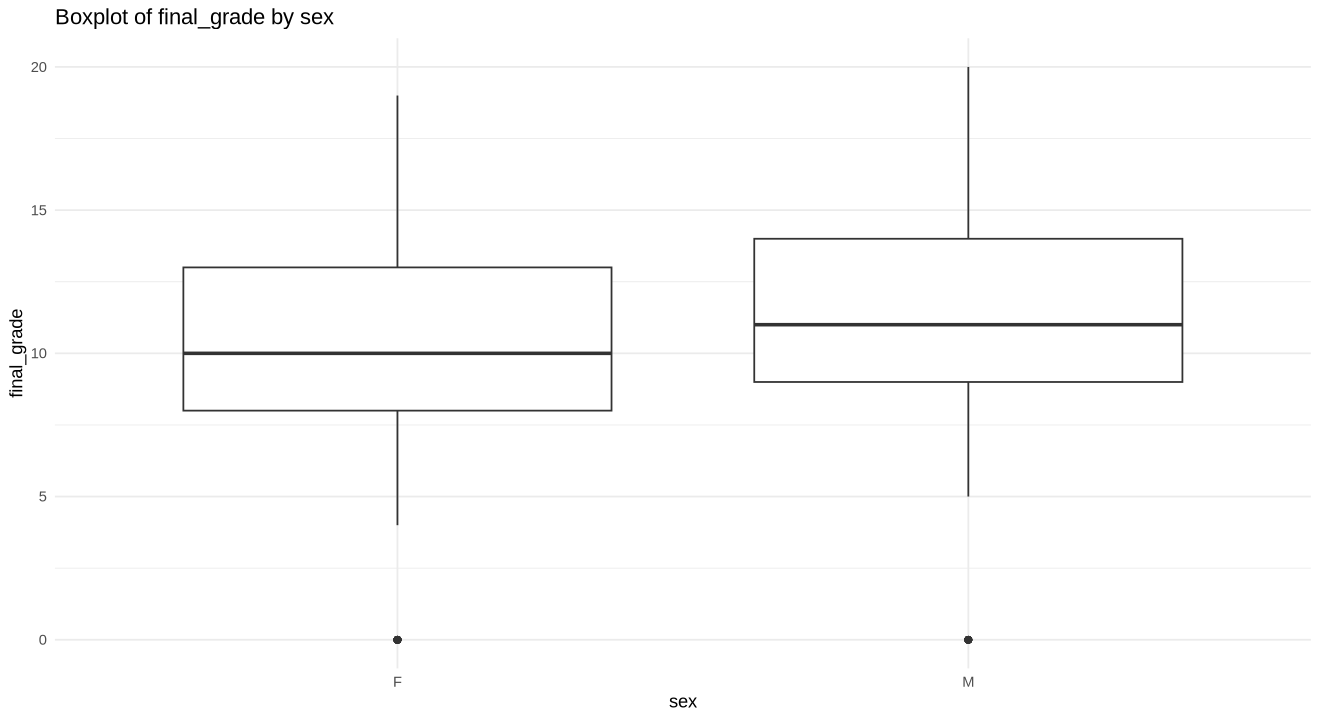

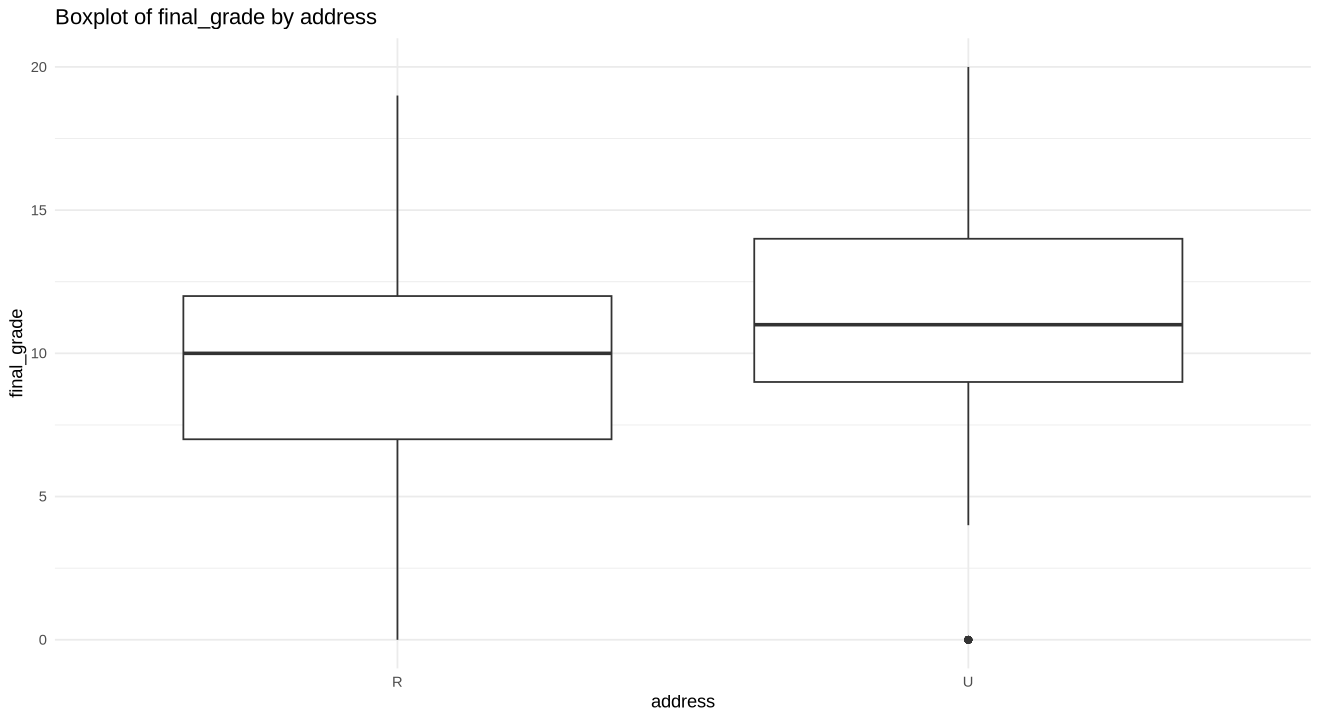

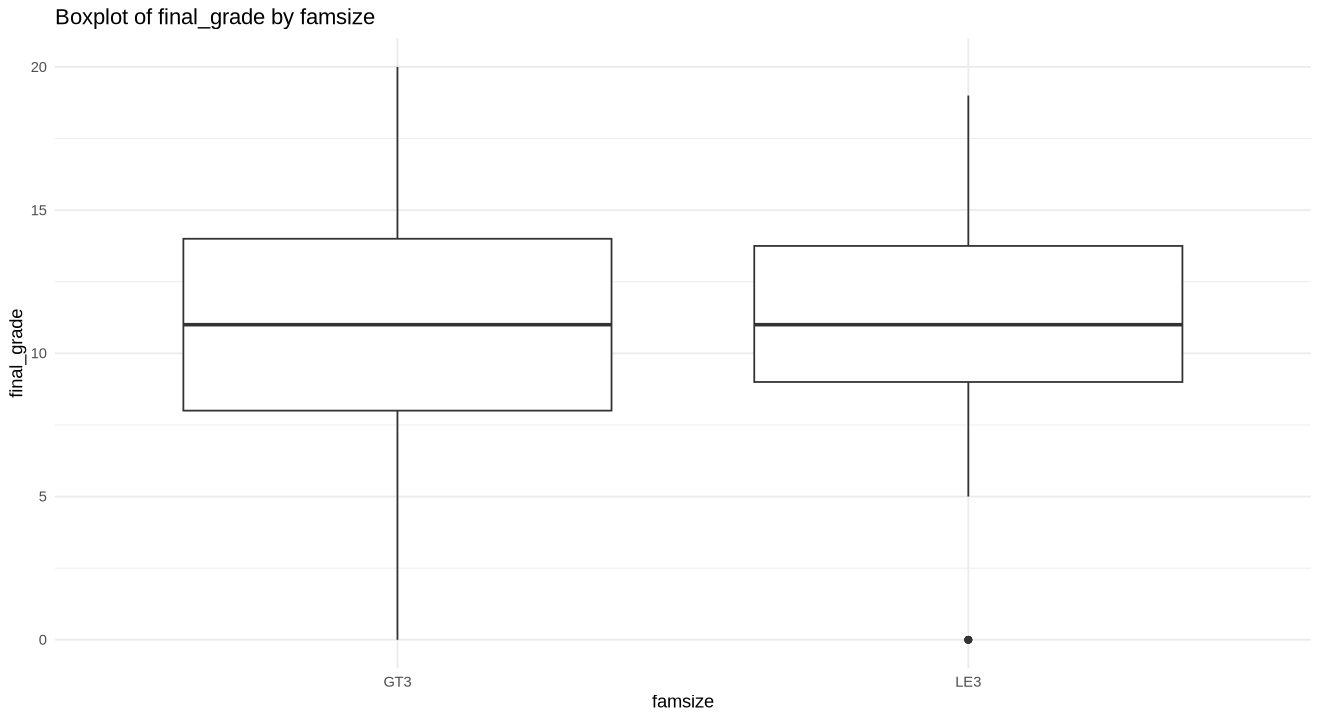

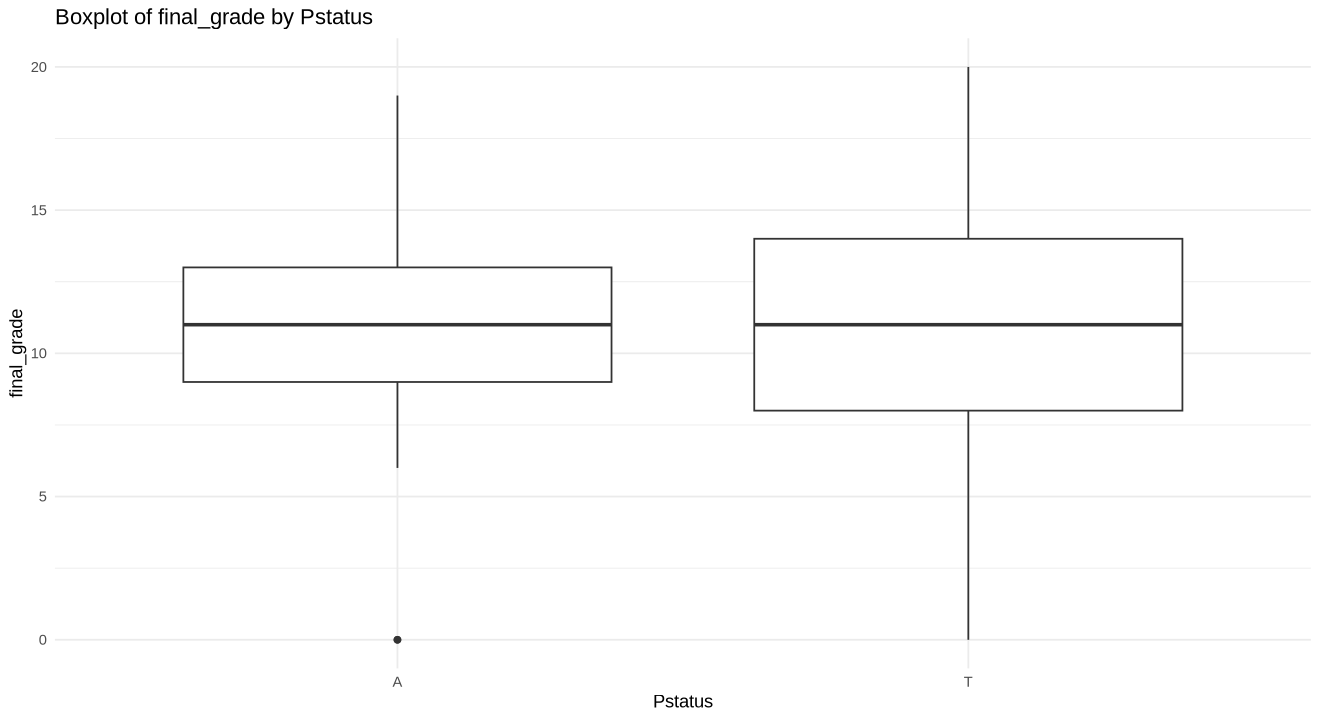

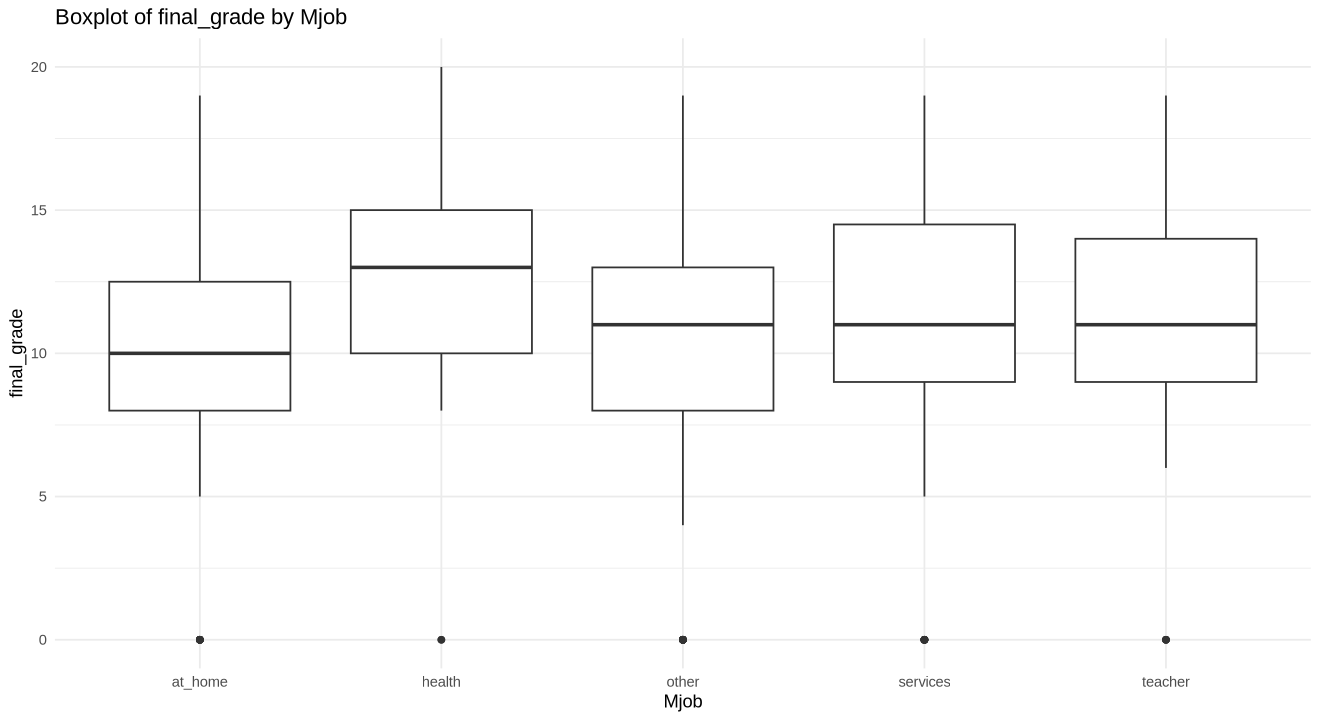

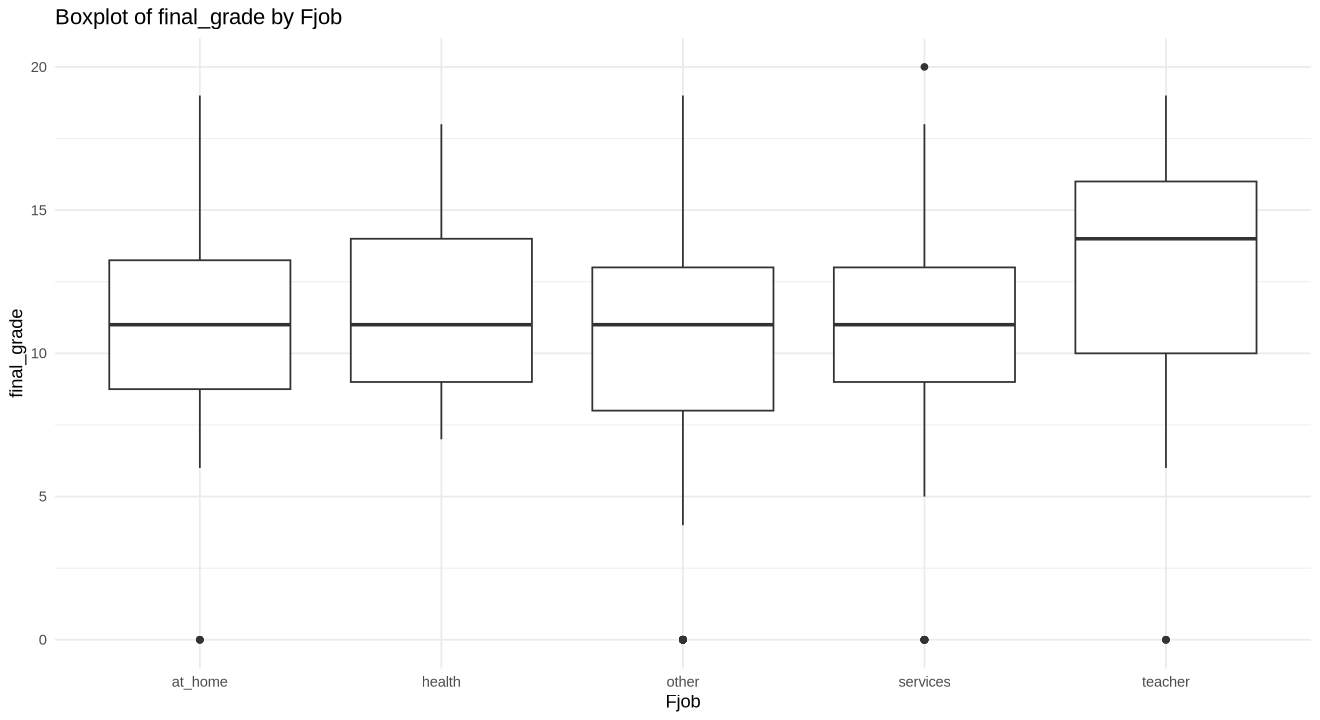

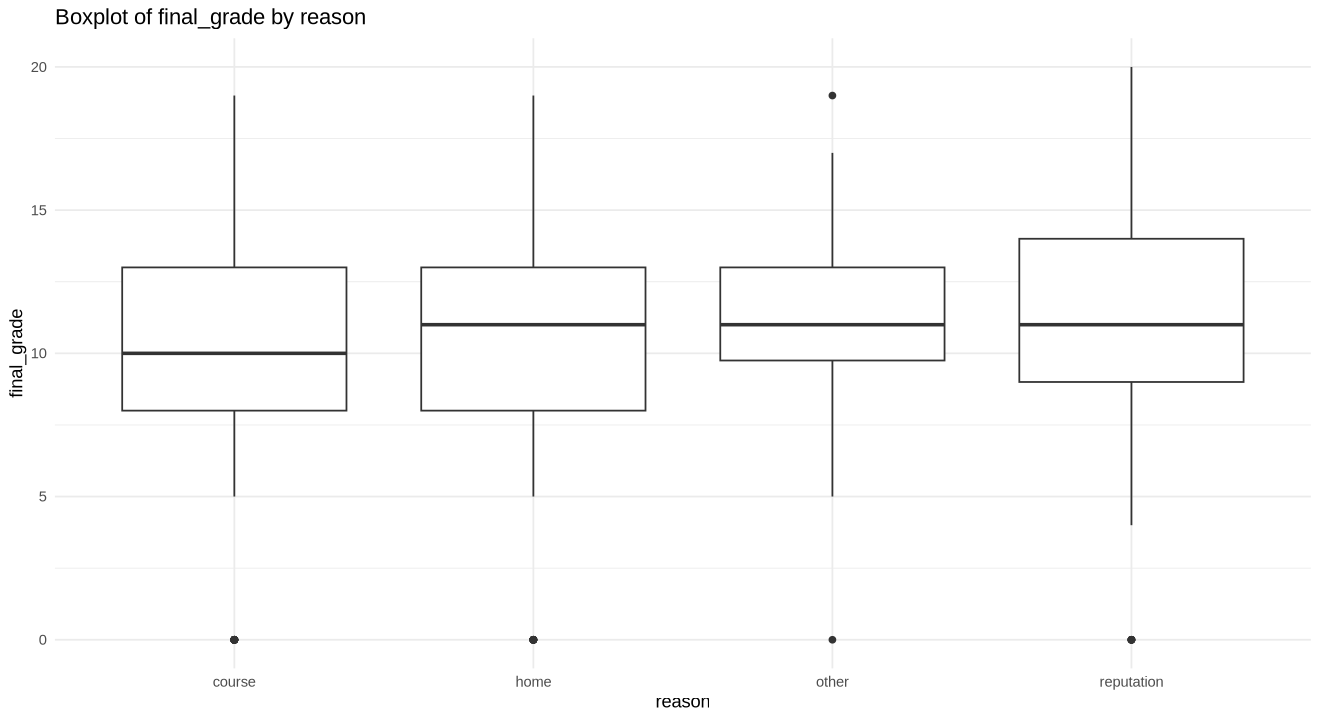

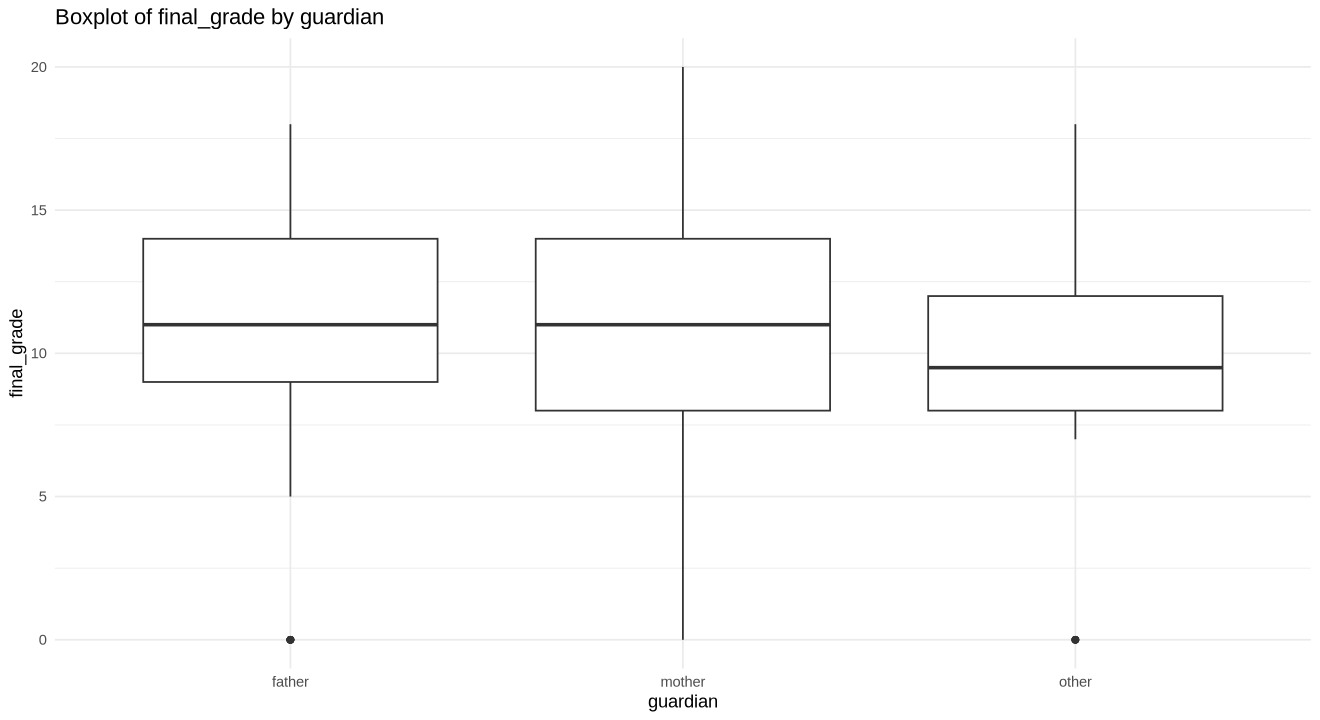

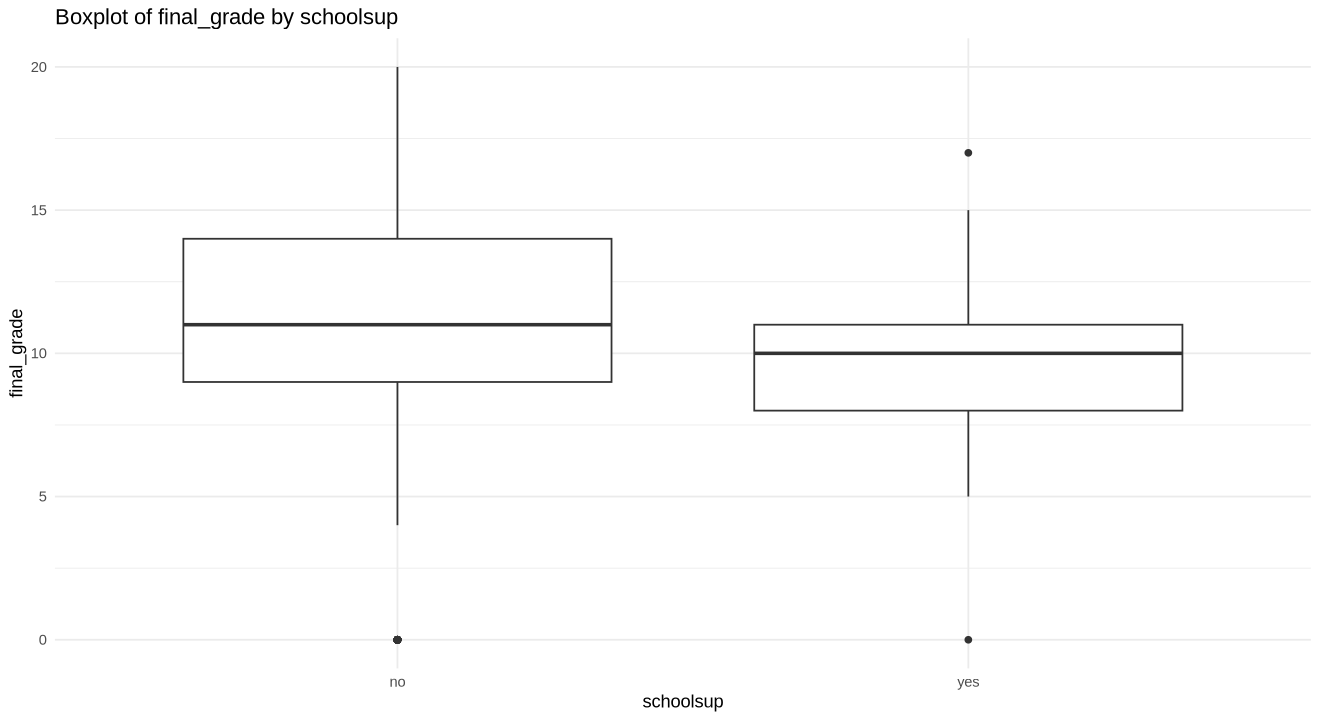

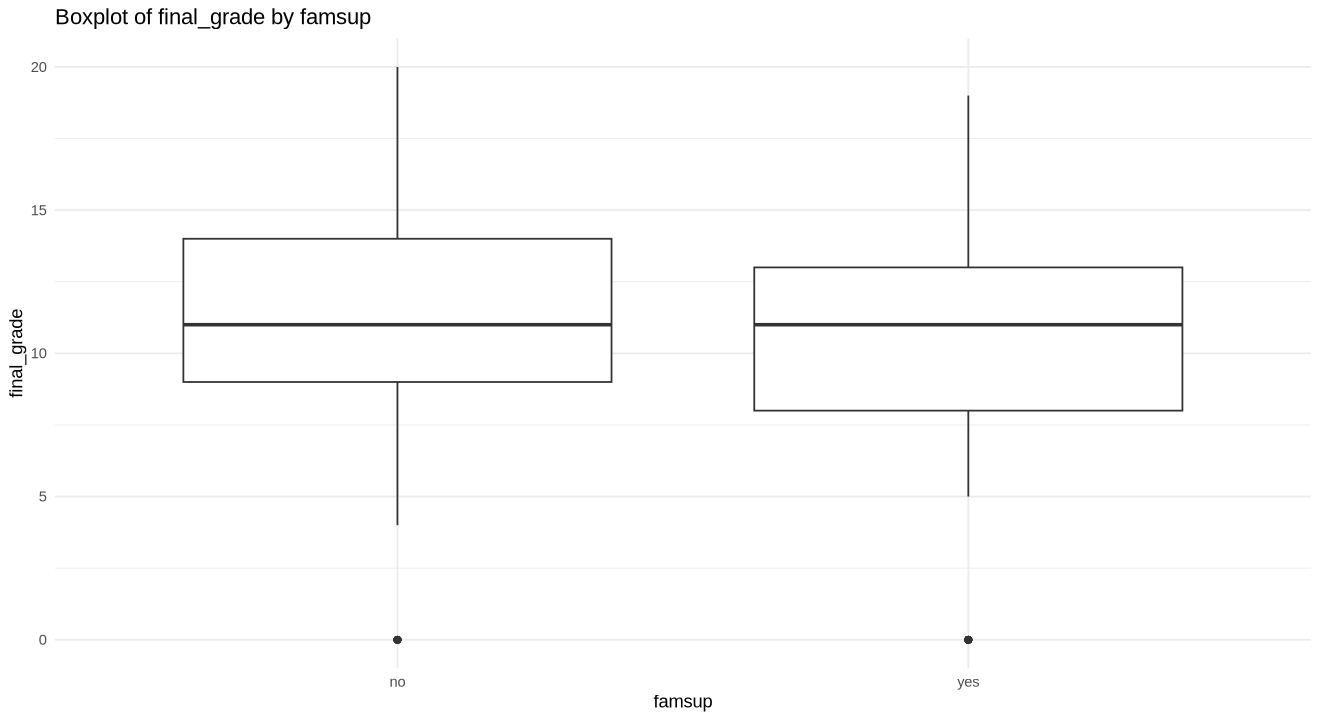

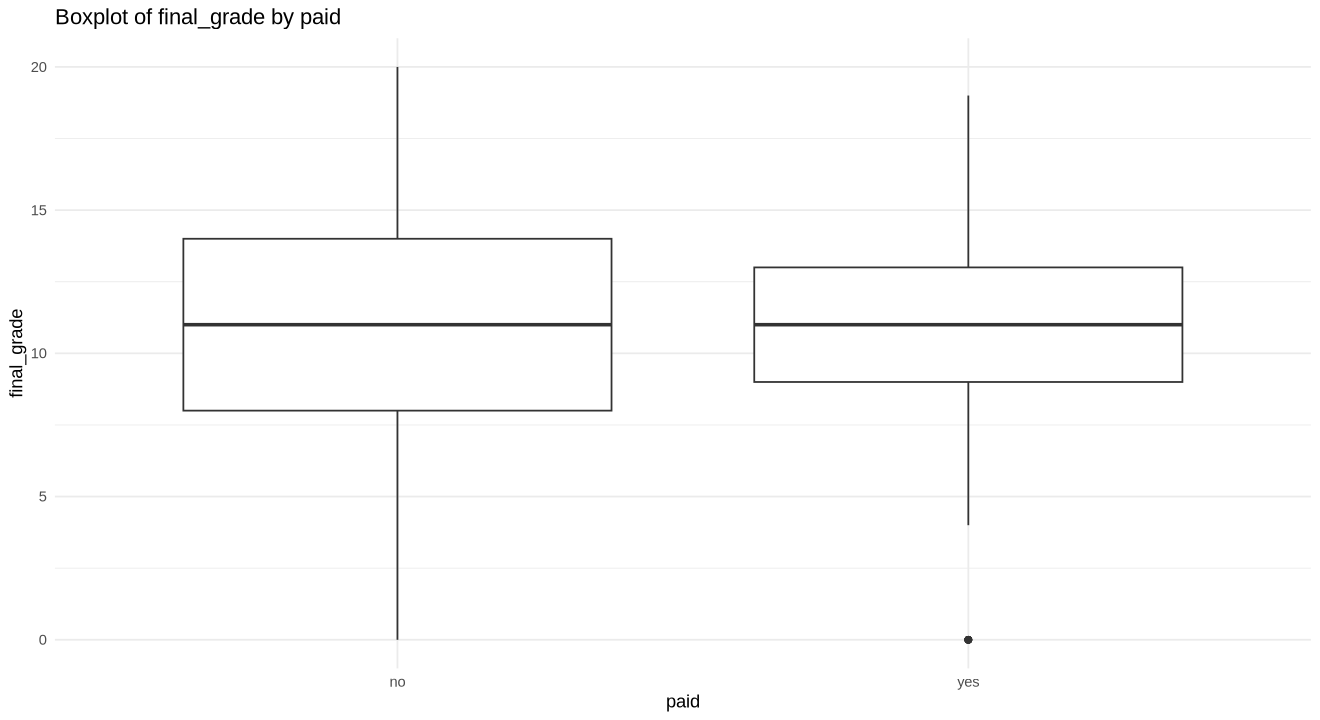

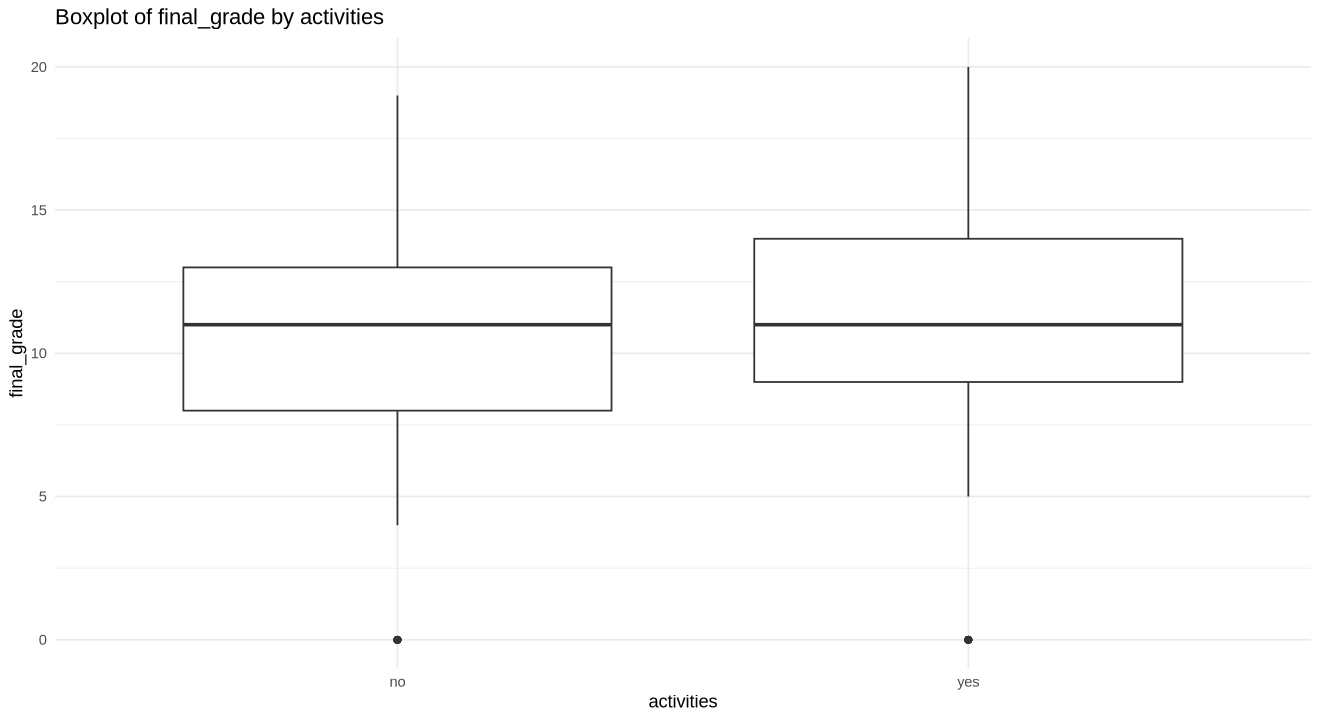

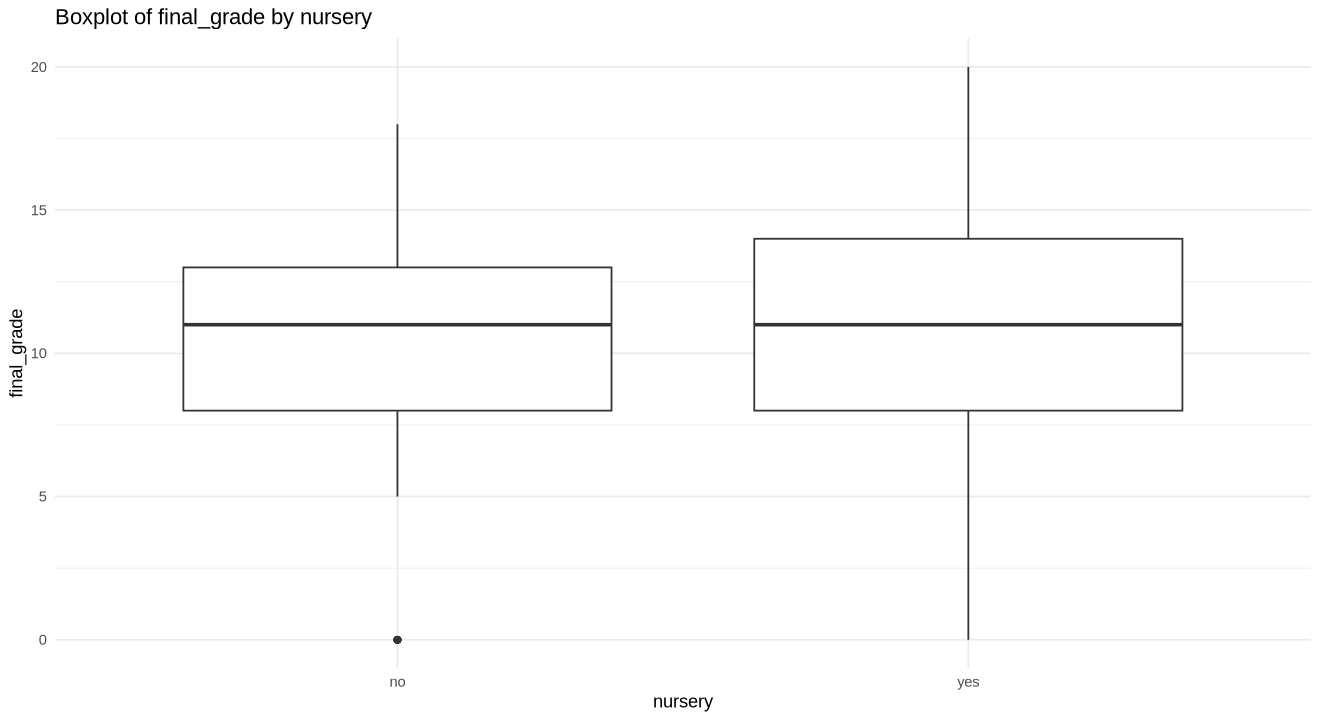

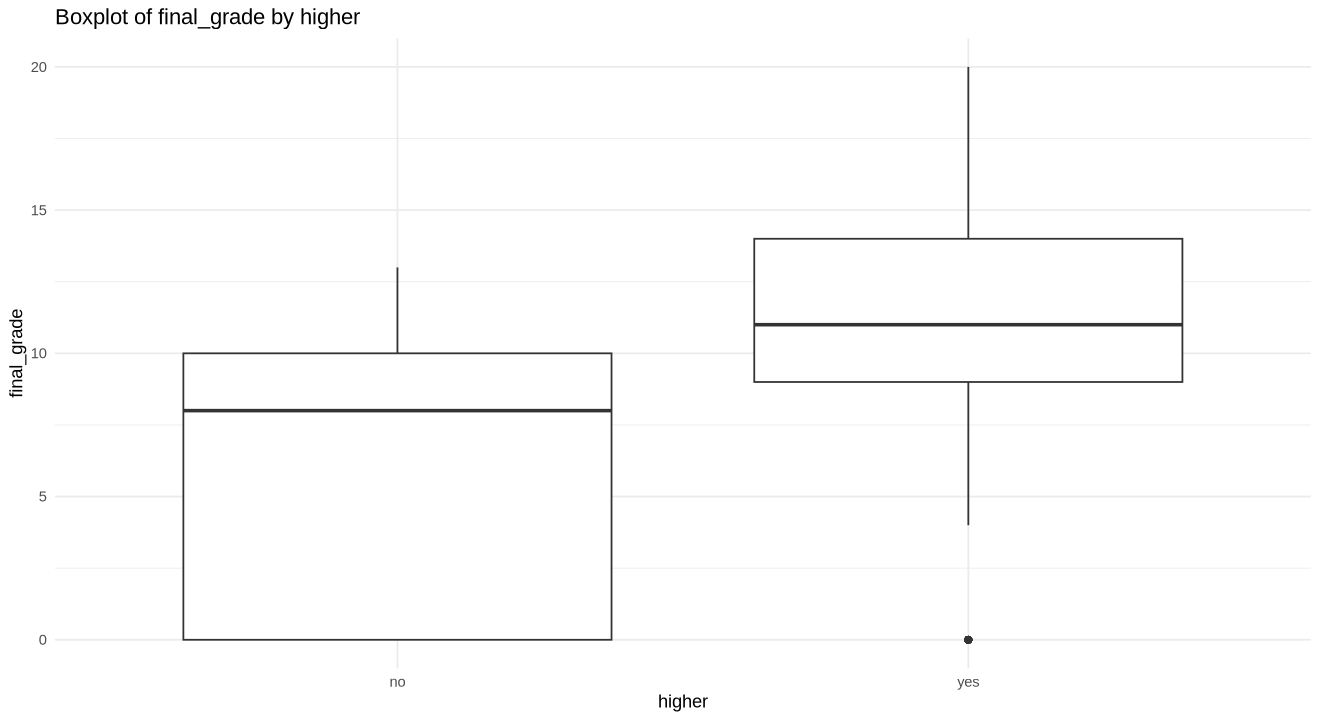

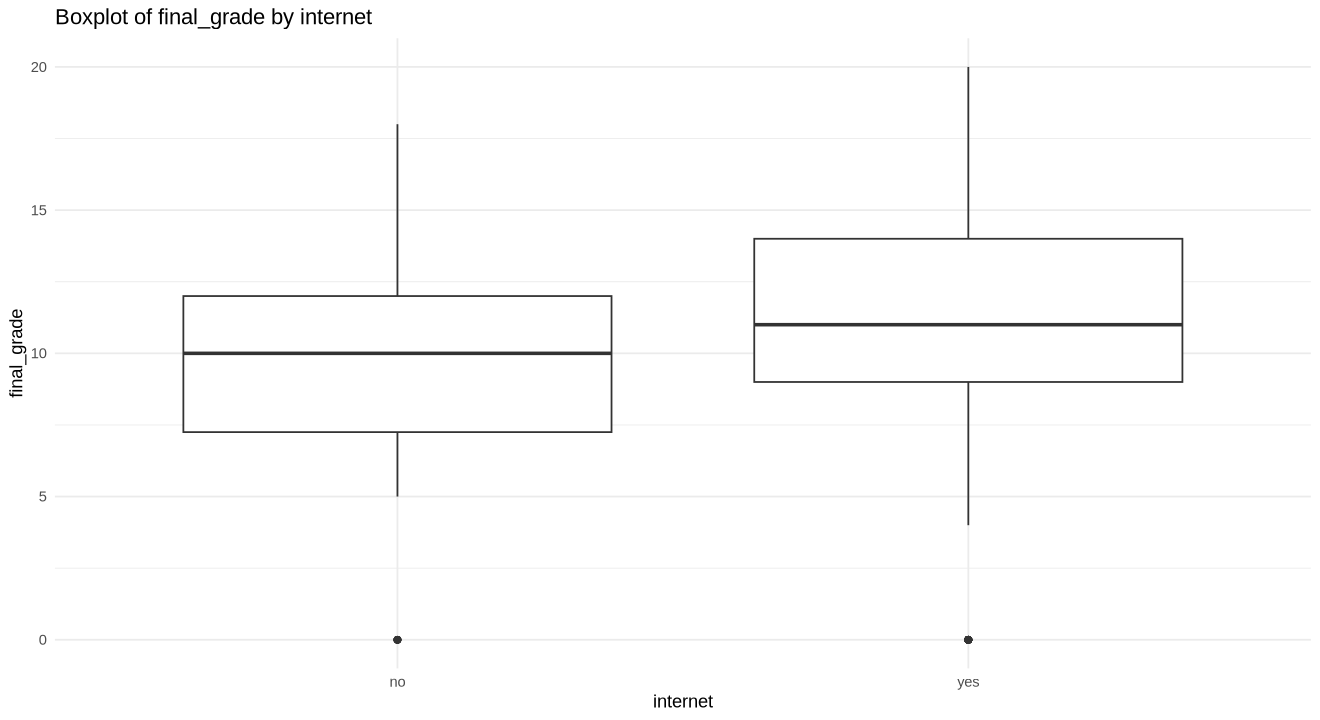

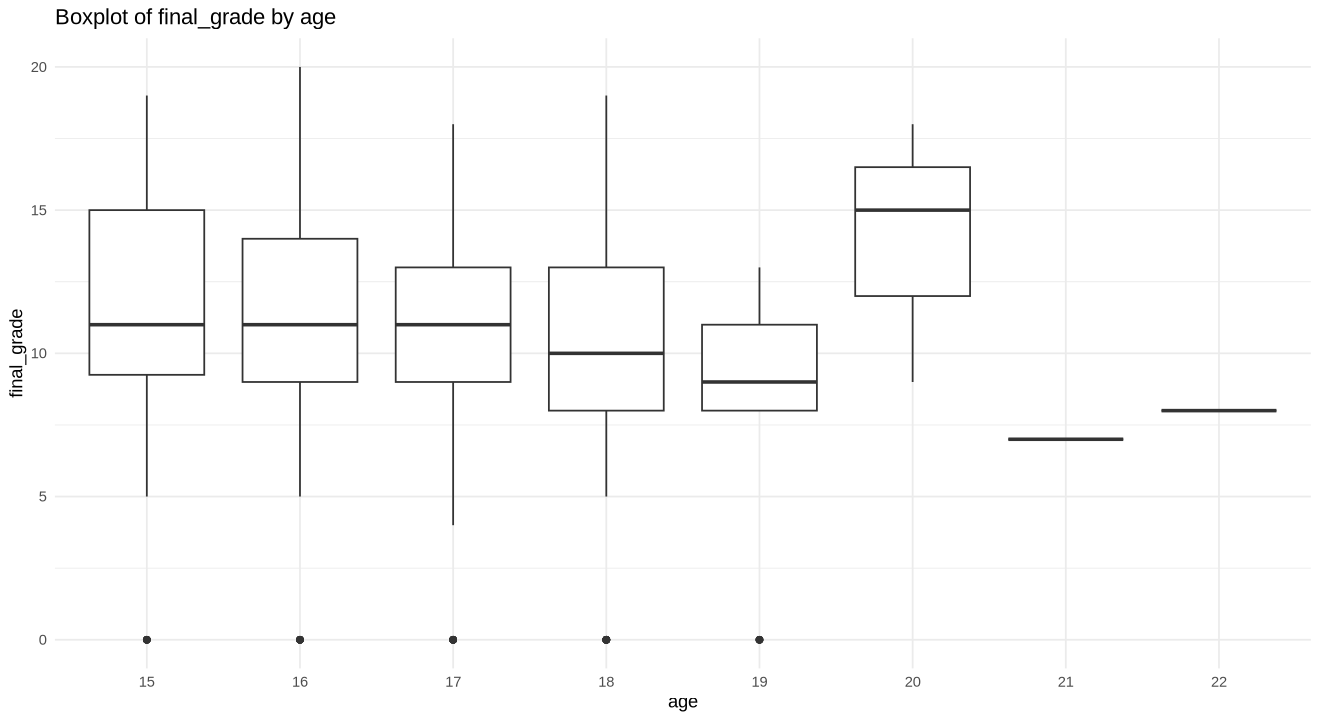

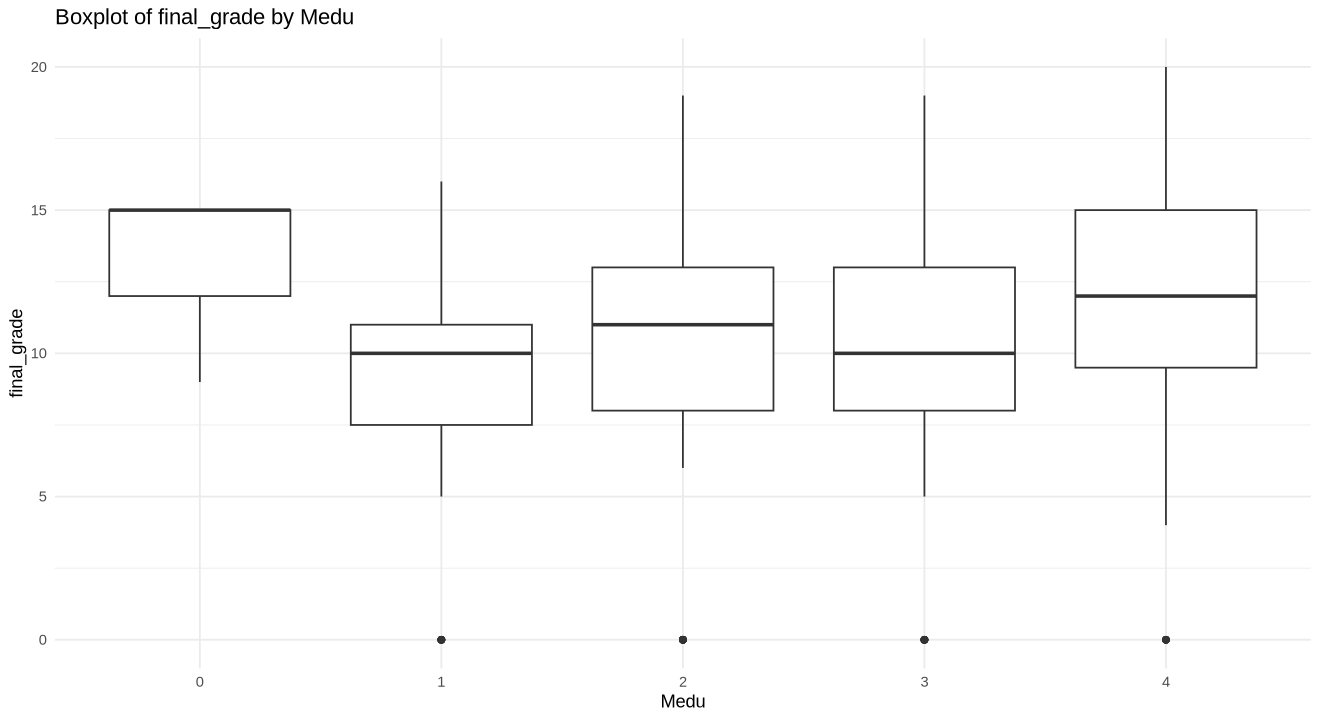

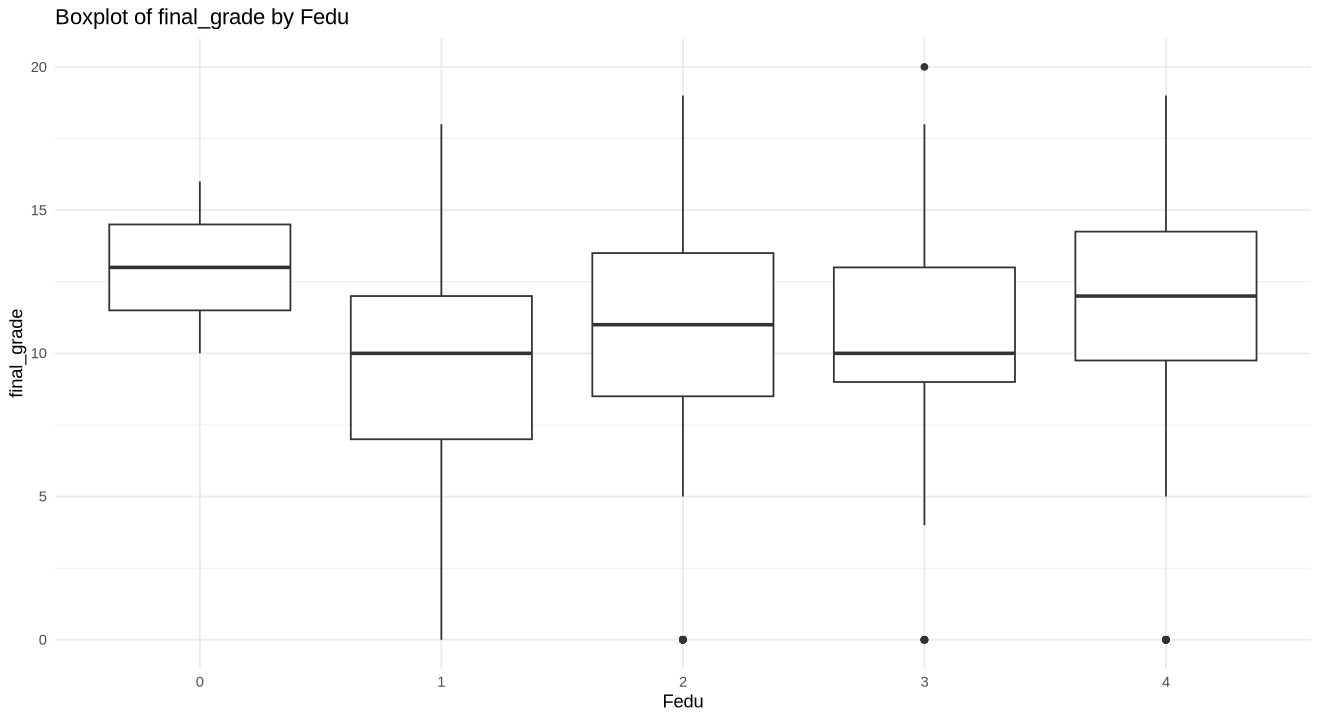

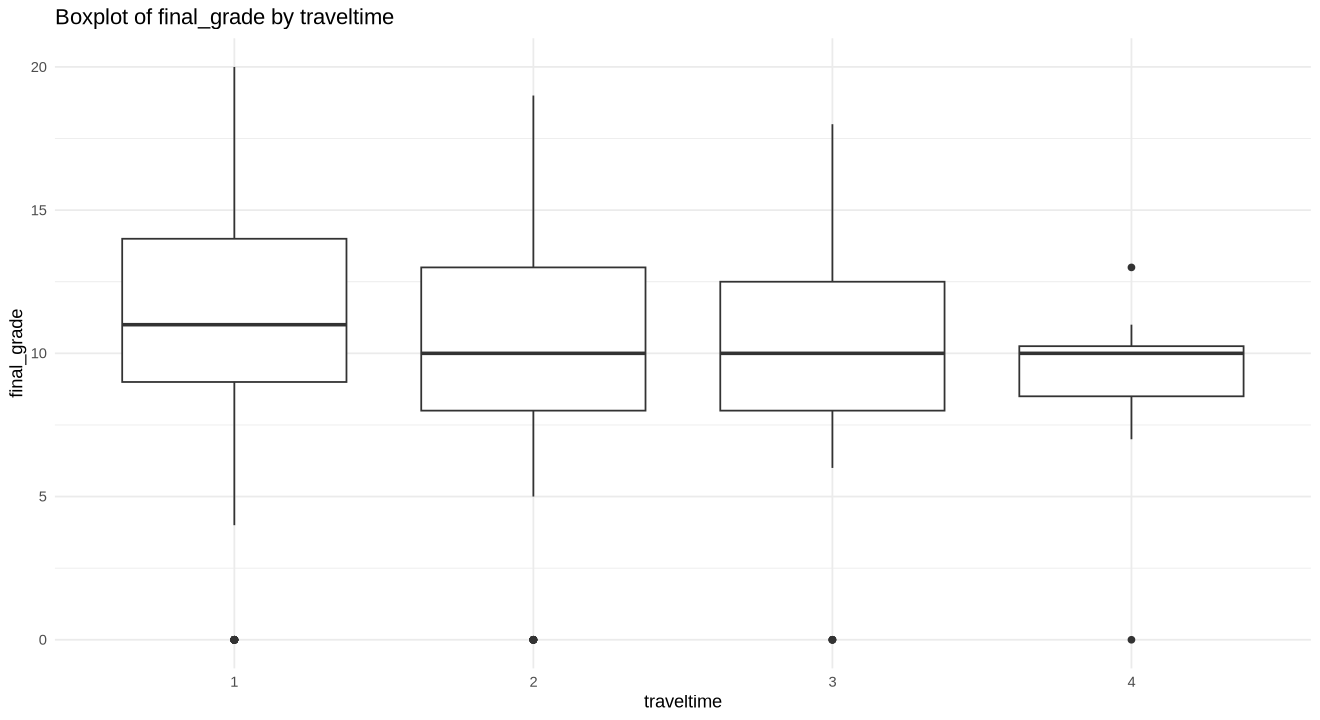

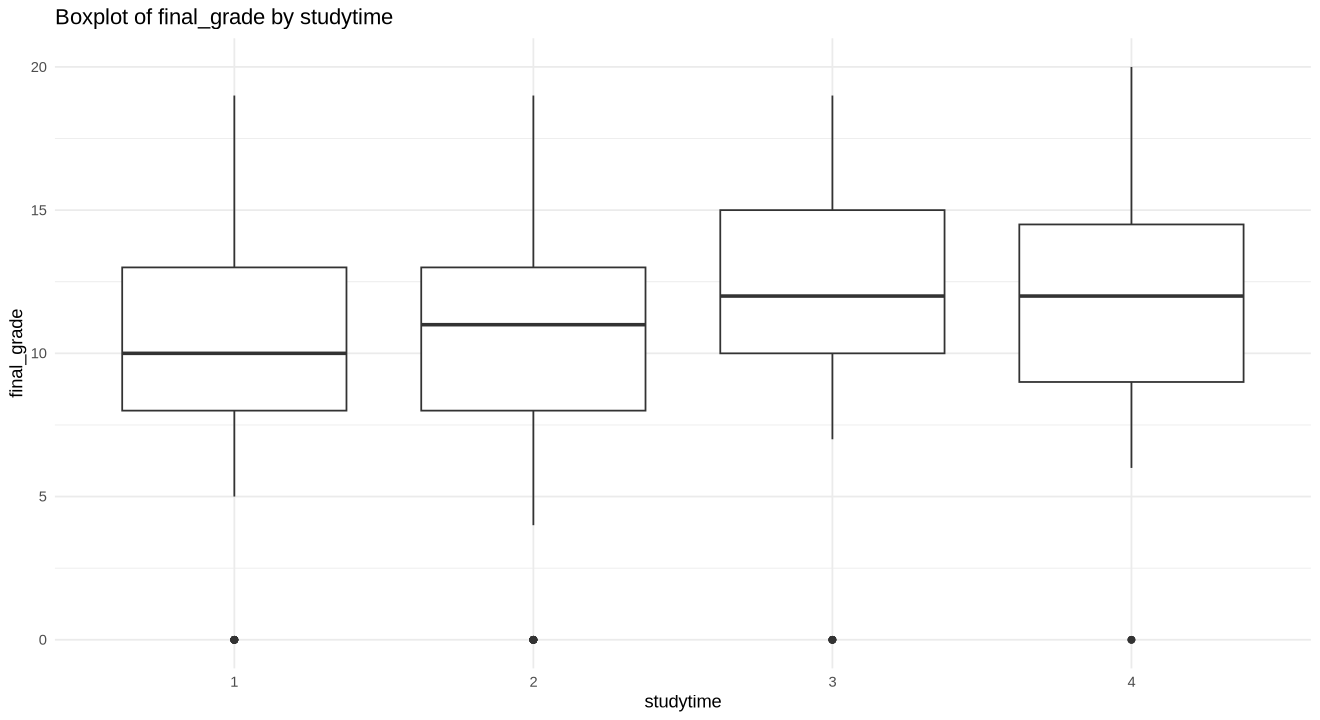

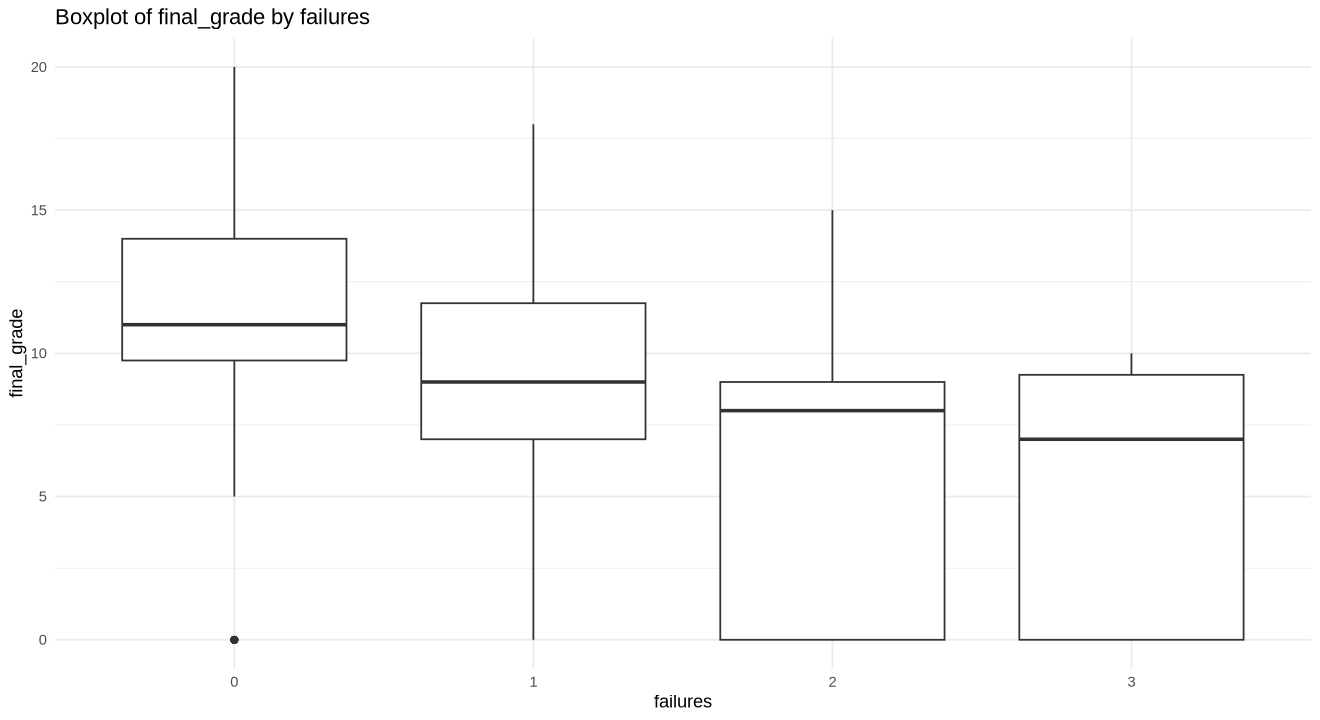

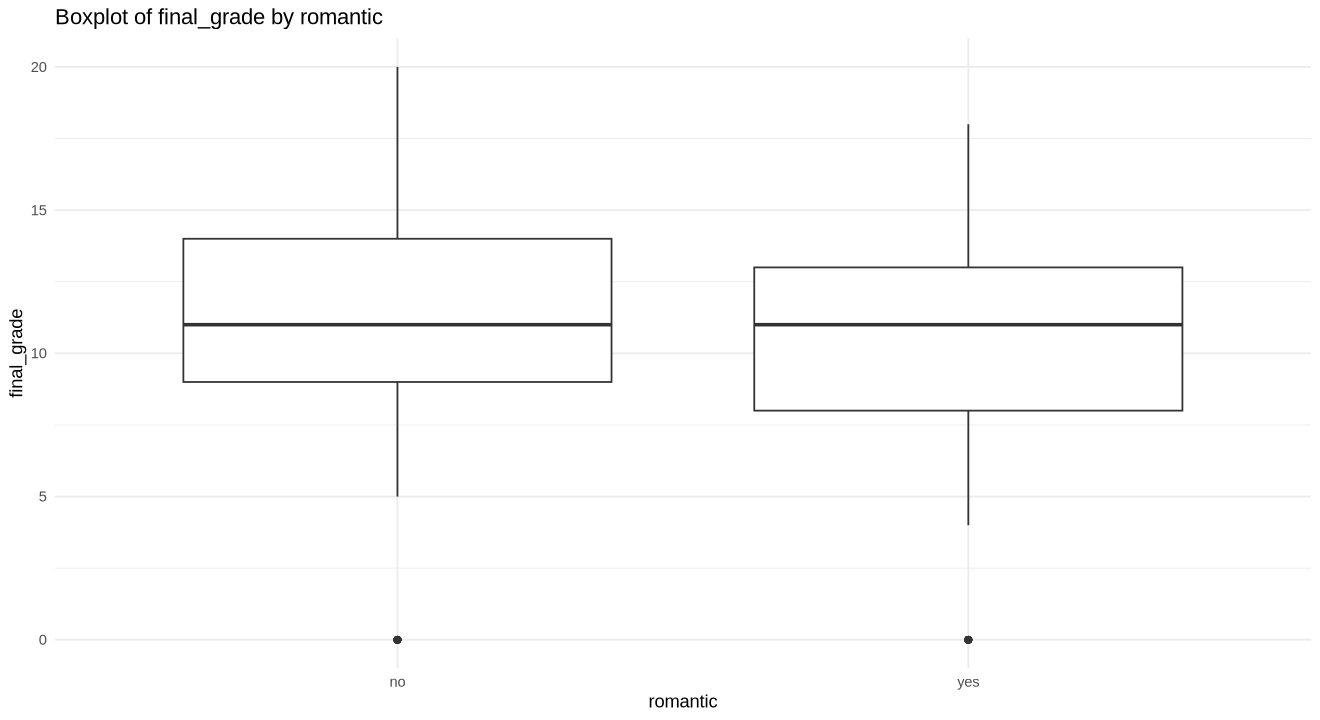

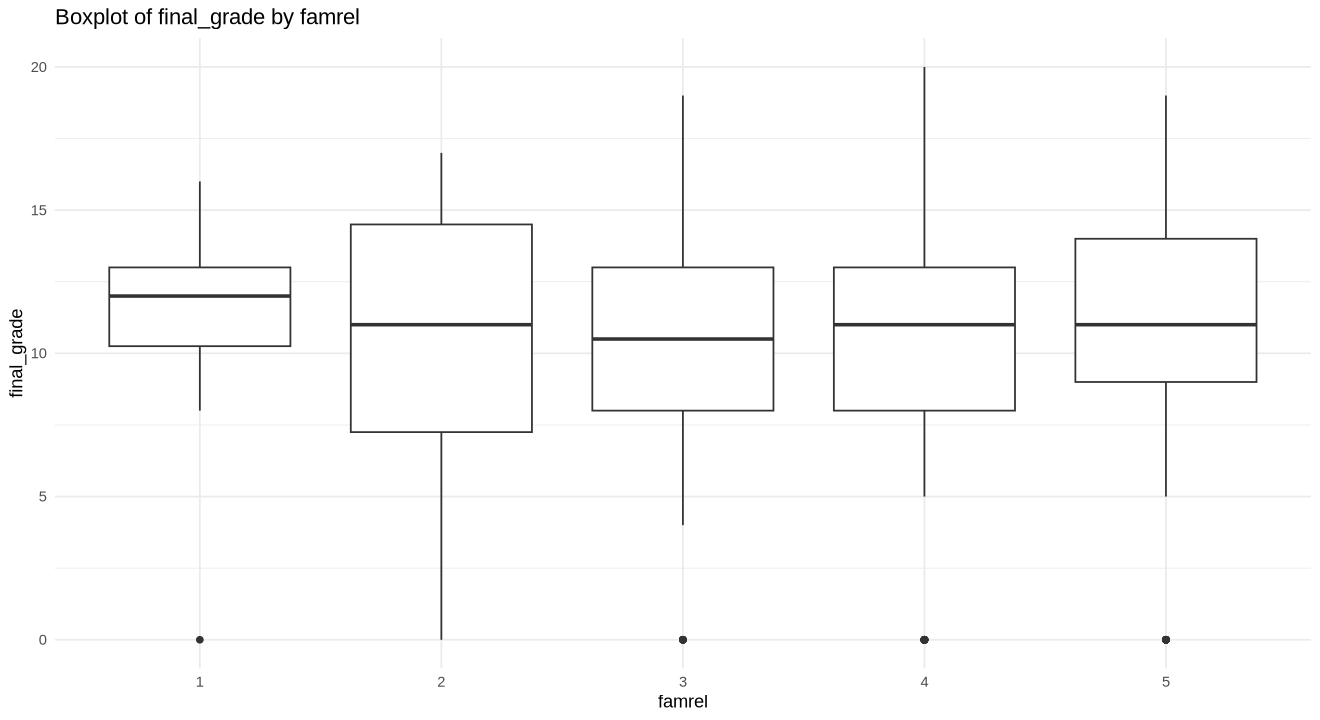

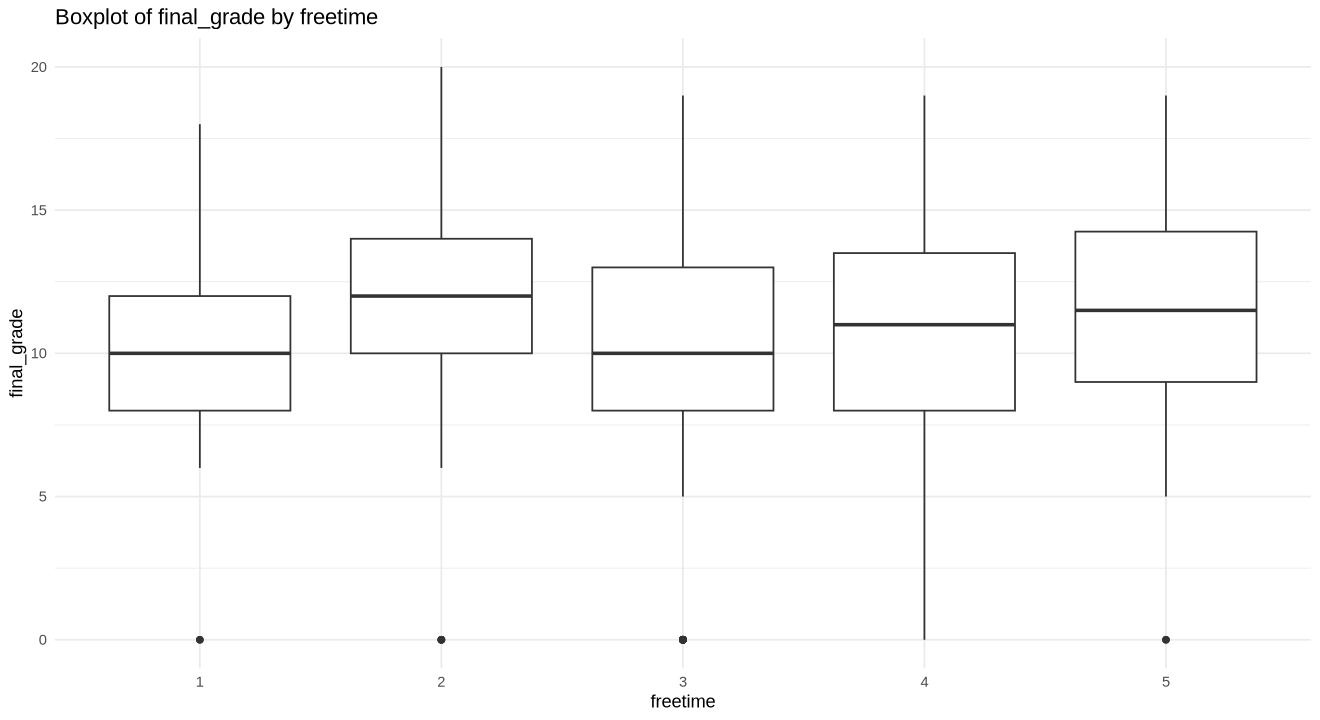

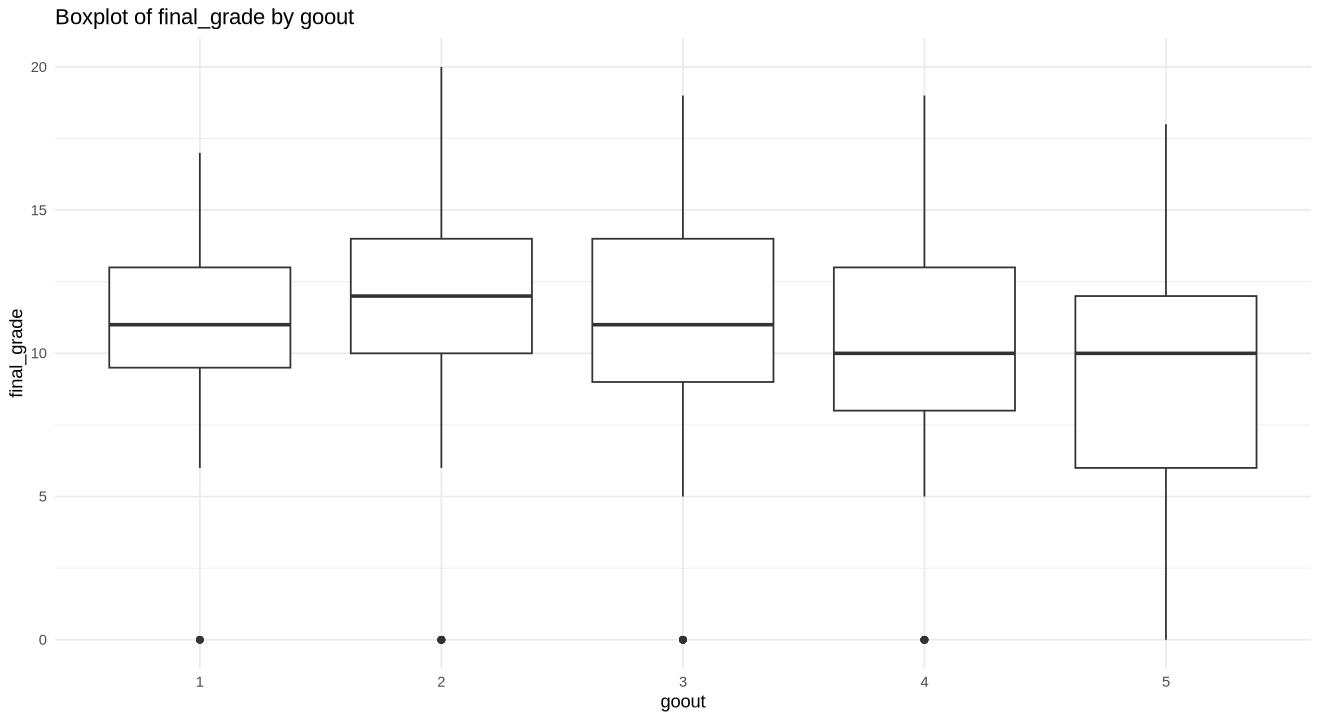

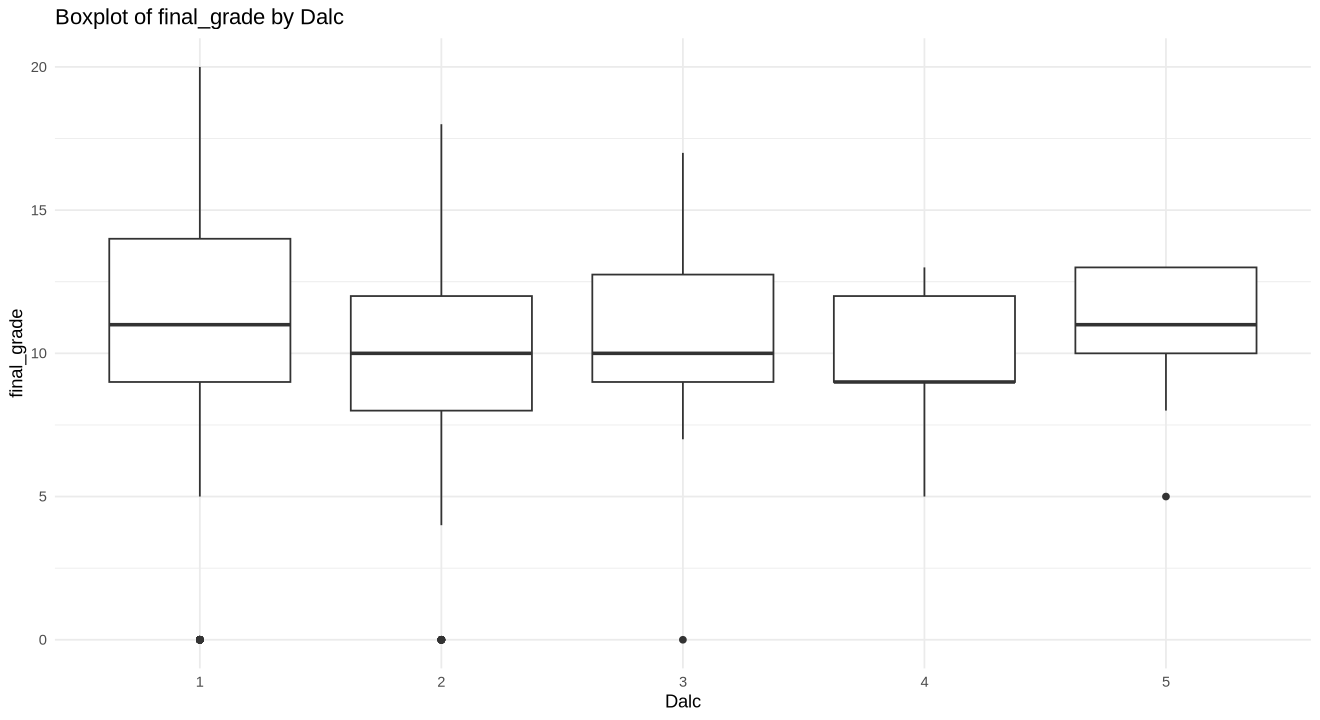

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]


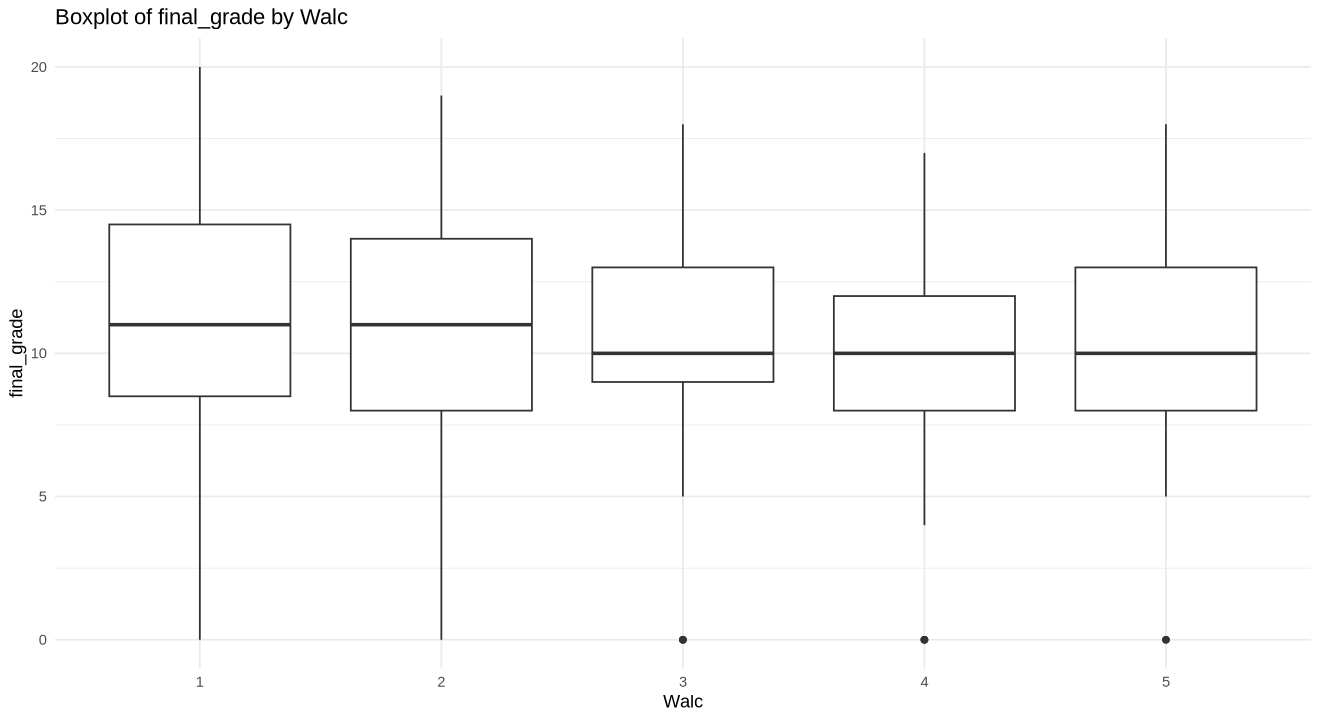

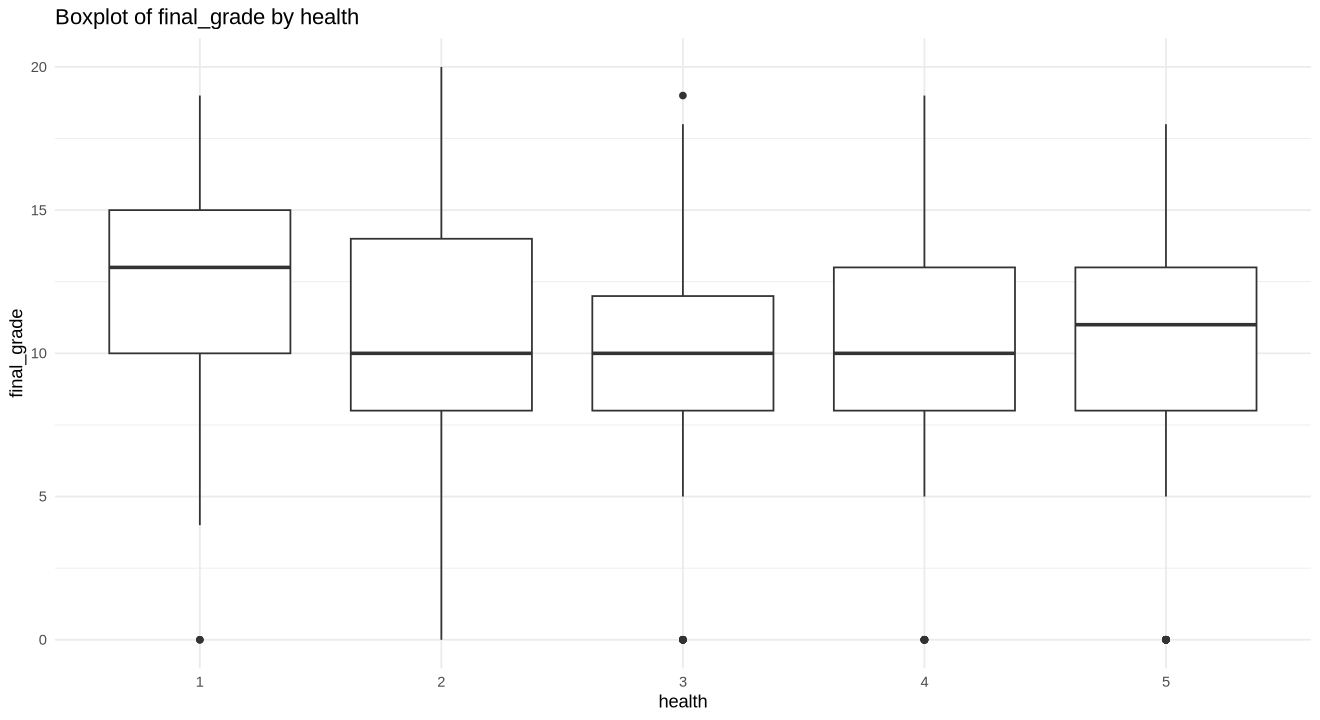

In [18]:
# Assuming your dataset is named `data`
# Identify categorical and continuous variables
categorical_vars <- c("sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", 
                      "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health")
# continuous_vars <- c("age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences")



# Choose a response variable (e.g., G3)
response_var <- "final_grade"

# Create boxplots for categorical variables
boxplots <- lapply(categorical_vars, function(var) {
  ggplot(data, aes_string(x = var, y = response_var)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle(paste("Boxplot of", response_var, "by", var))
})

# Combine all plots
all_plots <- c(boxplots)
all_plots

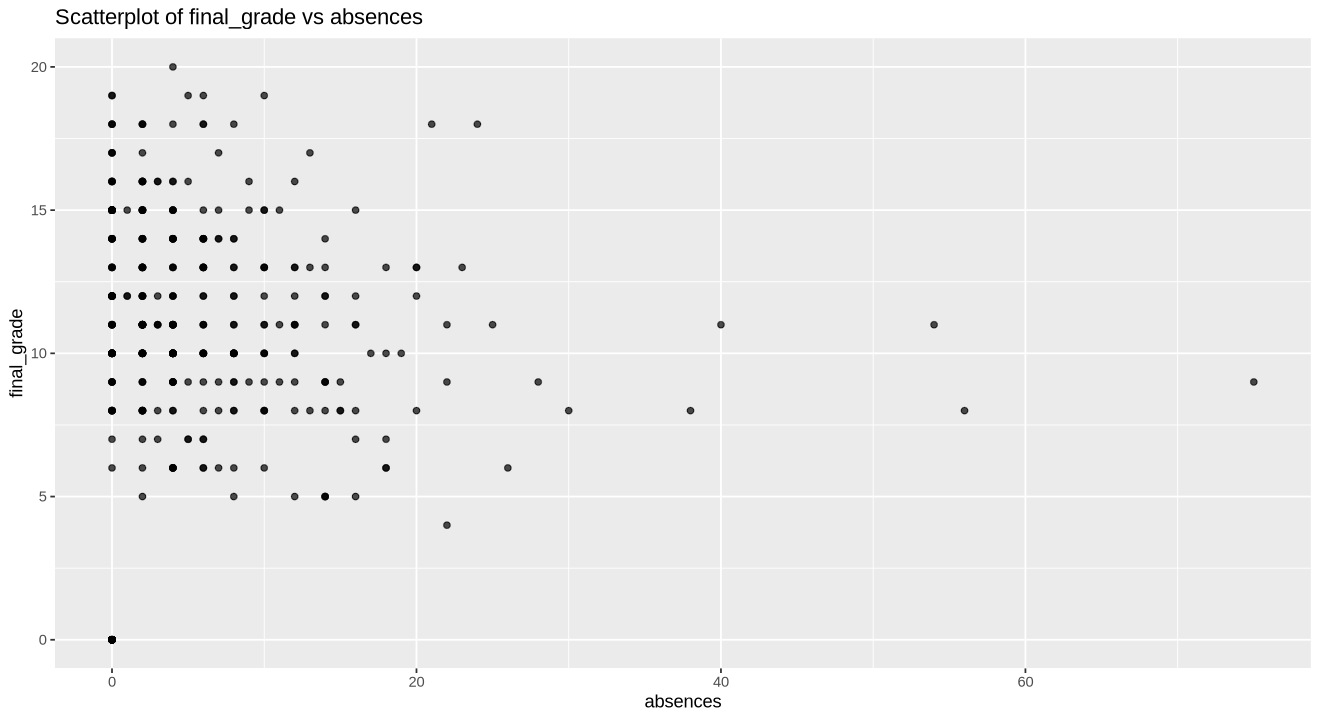

In [19]:
scatterplot <- ggplot(data, aes(x = absences, y = final_grade)) +
    geom_point(alpha = 0.7) +
    ggtitle(paste("Scatterplot of", response_var, "vs absences"))

scatterplot

In [20]:
data_no_zero <- data |>
                filter(final_grade != 0)

head(data_no_zero)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


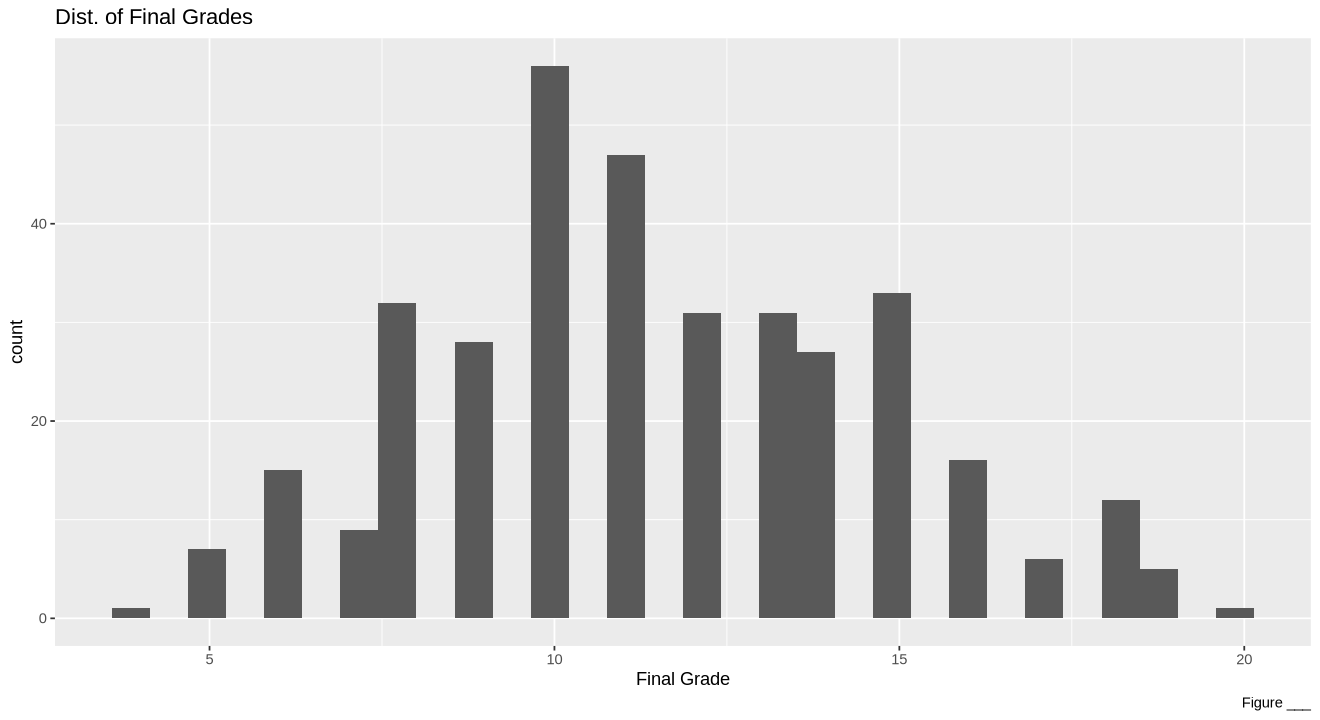

In [21]:
dist <- ggplot(aes(x = final_grade) , data = data_no_zero) +
        geom_histogram(bins = 15) +
        labs(x = "Final Grade",
             title = "Dist. of Final Grades",
             caption = "Figure ___")
dist

## Fitting Model: Logistic Regression

## Analysis

## Conclusion

## Appendix

## References